## Word Embeddings

Word Embeddings are a method of extracting features out of text so that we can input those features into a machine learning model to work with text data.

## Bag-of-words


The following models a text document using bag-of-words. Here are two simple text documents:

(1) John likes to watch movies. Mary likes movies too.

(2) Mary also likes to watch football games.

Based on these two text documents, a Tokenization is constructed as follows for each document:

"John","likes","to","watch","movies","Mary","likes","movies","too"

"Mary","also","likes","to","watch","football","games"

Representing each bag-of-words as a JSON object/ Dict

BoW1 = {"John":1,"likes":2,"to":1,"watch":1,"movies":2,"Mary":1,"too":1};
BoW2 = {"Mary":1,"also":1,"likes":1,"to":1,"watch":1,"football":1,"games":1};

Each key is the word, and each value is the number of occurrences of that word in the given text document.

The order of elements is free, so, for example {"too":1,"Mary":1,"movies":2,"John":1,"watch":1,"likes":2,"to":1} is also equivalent to BoW1. 

Note: if another document is like a union of these two,

(3) John likes to watch movies. Mary likes movies too. Mary also likes to watch football games.
its  representation will be:

BoW3 = {"John":1,"likes":3,"to":2,"watch":2,"movies":2,"Mary":2,"too":1,"also":1,"football":1,"games":1};
So, as we see in the bag algebra, the "union" of two documents in the bags-of-words representation is, formally, the disjoint union, summing the multiplicities of each element.



Application
In practice, the Bag-of-words model is mainly used as a tool of feature generation. After transforming the text into a "bag of words", we can calculate various measures to characterize the text. The most common type of characteristics, or features calculated from the Bag-of-words model is term frequency, namely, the number of times a term appears in the text. For the example above, we can construct the following two lists to record the term frequencies of all the distinct words (BoW1 and BoW2 ordered as in BoW3):

(1) [1, 2, 1, 1, 2, 1, 1, 0, 0, 0]

(2) [0, 1, 1, 1, 0, 1, 0, 1, 1, 1]

                                                                                                               Source : wiki

Drawbacks of using a Bag-of-Words (BoW) 
If the new sentences contain new words, then our vocabulary size would increase and thereby, the length of the vectors would increase too. Additionally, the vectors would also contain many 0s, thereby resulting in a sparse matrix (which is what we would like to avoid)

In [17]:
documents = ["Dog bites man.", "Man bites dog.", "Dog eats meat.", "Man eats food."] #Same as the earlier notebook
processed_docs = [doc.lower().replace(".","") for doc in documents]
processed_docs

['dog bites man', 'man bites dog', 'dog eats meat', 'man eats food']

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

#look at the documents list
print("Our corpus: ", processed_docs)

count_vect = CountVectorizer()
#Build a BOW representation for the corpus
bow_rep = count_vect.fit_transform(processed_docs)

#Look at the vocabulary mapping
print("Our vocabulary: ", count_vect.vocabulary_)

#see the BOW rep for first 2 documents
print("BoW representation for 'dog bites man': ", bow_rep[0].toarray())
print("BoW representation for 'man bites dog: ",bow_rep[1].toarray())

#Get the representation using this vocabulary, for a new text
temp = count_vect.transform(["dog and dog are friends"])
print("Bow representation for 'dog and dog are friends':", temp.toarray())

Our corpus:  ['dog bites man', 'man bites dog', 'dog eats meat', 'man eats food']
Our vocabulary:  {'dog': 1, 'bites': 0, 'man': 4, 'eats': 2, 'meat': 5, 'food': 3}
BoW representation for 'dog bites man':  [[1 1 0 0 1 0]]
BoW representation for 'man bites dog:  [[1 1 0 0 1 0]]
Bow representation for 'dog and dog are friends': [[0 2 0 0 0 0]]


 In the above code, we represented the text considering the frequency of words into account. However, sometimes, we don't care about frequency much, but only want to know whether a word appeared in a text or not. That is, each document is represented as a vector of 0s and 1s. We will use the option binary=True in CountVectorizer for this purpose.

In [10]:
#BoW with binary vectors
count_vect = CountVectorizer(binary=True)
count_vect.fit(processed_docs)
temp = count_vect.transform(["dog and dog are friends"])
print("Bow representation for 'dog and dog are friends':", temp.toarray())

Bow representation for 'dog and dog are friends': [[0 1 0 0 0 0]]


# TF-IDF

TF-IDF which means Term Frequency and Inverse Document Frequency

Understanding TF-IDF in Details with example:
Let’s understand TF-IDF though the same example which we saw in “Bag of words”

Let’s say we have sentences like below

1.He is eating Veg

2.She is eating NonVeg

3.Both are eating Food

After Applying data cleansing technique and apply stop words we will get below sentences words and there count.


  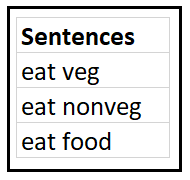

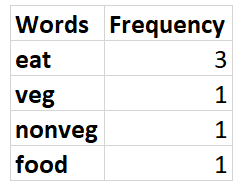

### Lets see the formula to calculate Term Frequency (TF)

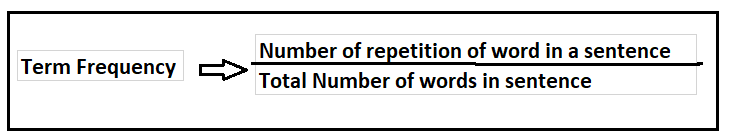

## Lets calculate Term Frequency for our sentences


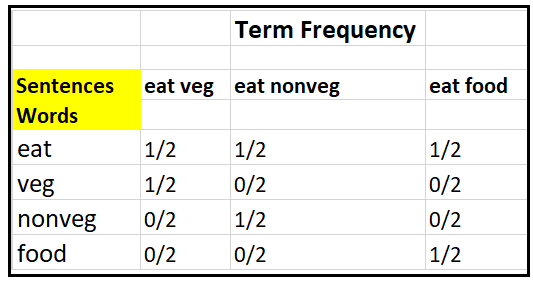

### Lets see the formula to calculate Inverse Document Frequency(IDF)

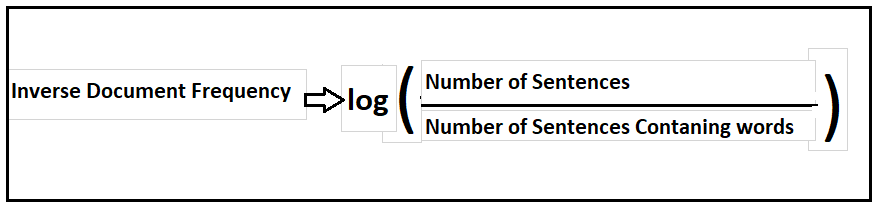

### Lets Calculate Inverse Document Frequency(IDF) for our words in sentences

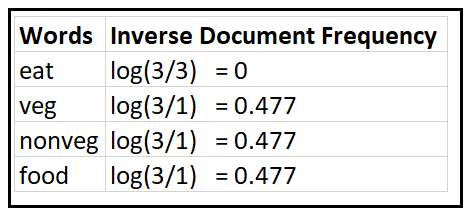


### Now to Calculate TF-IDF ,multiply TF table generated above with IDF

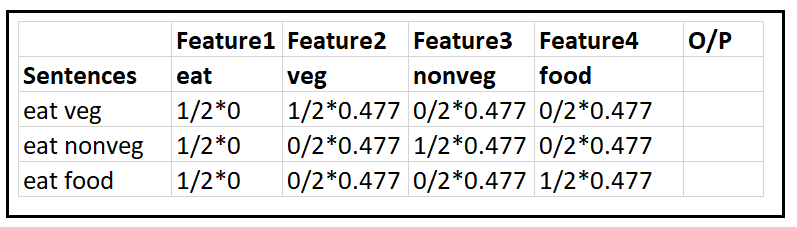



### After Simplifying we get below table of TF * IDF Matrix

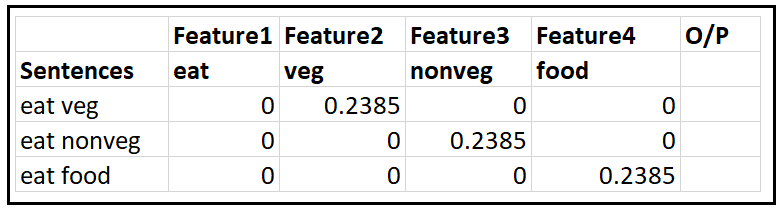

                                                                                                             source: Medium 










### NLTK  TF-IDF implementation

In [13]:
from nltk.text import TextCollection
from nltk.tokenize import word_tokenize
 
sents=['this is sentence one','this is sentence two','this is sentence three']
sents=[word_tokenize(sent) for sent in sents]
print(sents)
corpus=TextCollection(sents)
print(corpus)
 
tf=corpus.tf('one',corpus)
print(tf)
 
idf=corpus.idf('one')
print(idf)
 
tf_idf=corpus.tf_idf('one',corpus)
print(tf_idf)

[['this', 'is', 'sentence', 'one'], ['this', 'is', 'sentence', 'two'], ['this', 'is', 'sentence', 'three']]
<Text: this is sentence one this is sentence two...>
0.08333333333333333
1.0986122886681098
0.0915510240556758


### SKlearn  Implementation 

In [14]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
 
x_train = ['The main idea of TF-IDF is that algorithm is an important feature that can be separated from the corpus background']
x_test=['Original text marked ',' main idea']
 
vectorizer = CountVectorizer(max_features=10)

tf_idf_transformer = TfidfTransformer() 

tf_idf = tf_idf_transformer.fit_transform(vectorizer.fit_transform(x_train))

x_train_weight = tf_idf.toarray()
 

tf_idf = tf_idf_transformer.transform(vectorizer.transform(x_test))
x_test_weight = tf_idf.toarray()
 
print('Output x_train text vector：')
print(x_train_weight)
print('Output x_test text vector：')
print(x_test_weight)

Output x_train text vector：
[[0.22941573 0.22941573 0.22941573 0.45883147 0.22941573 0.22941573
  0.22941573 0.22941573 0.45883147 0.45883147]]
Output x_test text vector：
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### Suppose that we have term count tables of a corpus consisting of only two documents, as listed on the right.


#### Perform  TF-IDF Calculation for this 2 doc manually using Pen & Paper

### N-Gram

it helps in combining the words. 

Uni-Gram : 1 word at a time

Bi-gram : 2 word at a time

Tri-gram : 3 word at a time

### Python Code to do Bi-gram

For example 

input="Phone is not good"

output=["Phone is"," is not","not good"]